In [1]:
import os
import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm 

In [2]:
# Load Train File
with open('./Dataset/SARS-COV-2/train.pkl', 'rb') as f:
    train = pickle.load(f)
    
# Load Test File
with open('./Dataset/SARS-COV-2/test.pkl', 'rb') as f:
    test = pickle.load(f)

In [3]:
x_train = []
y_train = []

for key in tqdm(train.keys()):
    feature = train[key][0]
    label = train[key][1]
    
    x_train.append(feature.reshape(2048,))
    y_train.append(label)
    
x_train = np.array(x_train)
y_train = np.array(y_train)

100%|██████████████████████████████████████████████████████████████████████████| 2008/2008 [00:00<00:00, 669275.46it/s]


In [4]:
x_test = []
y_test = []

for key in tqdm(test.keys()):
    feature = test[key][0]
    label = test[key][1]
    
    x_test.append(feature.reshape(2048,))
    y_test.append(label)
    
x_test = np.array(x_test)
y_test = np.array(y_test)

100%|████████████████████████████████████████████████████████████████████████████| 224/224 [00:00<00:00, 223589.74it/s]


In [5]:
print(x_test.shape, x_train.shape)

(224, 2048) (2008, 2048)


### Normalize Data

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

### Train Model

In [8]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from scipy import stats

In [9]:
models = []

models.append(SVC())
models.append(DecisionTreeClassifier())
models.append(RandomForestClassifier())
models.append(KNeighborsClassifier())
models.append(GaussianNB())

In [10]:
for model in tqdm(models):
    model.fit(x_train, y_train)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:09<00:00,  1.95s/it]


In [11]:
def get_prediction(data):
    ypred = []
    for sample in tqdm(data):
        sample = np.array(sample).reshape(1,-1)
        predictions = []
        for model in models:
            pred = model.predict(sample)
            predictions.append(pred[0])
            
        majority = stats.mode(predictions)[0][0]
        ypred.append(majority)
        
    return ypred

In [12]:
ypred = get_prediction(x_test)
print(len(ypred))

100%|████████████████████████████████████████████████████████████████████████████████| 224/224 [00:04<00:00, 47.98it/s]

224


In [13]:
sum(ypred==y_test)/len(ypred)

0.8392857142857143

In [14]:
# save models and scalar
with open('./classifier_scalar.pkl', 'wb') as f:
    pickle.dump((models, scalar),f)

In [15]:
with open('./classifier_scalar.pkl','rb') as f:
    models,scalar = pickle.load(f)

### Test Model

In [16]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import Prediction 
import cv2

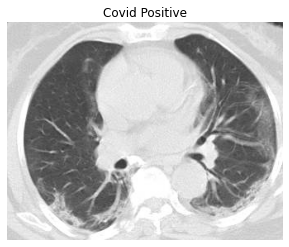

In [17]:
img = cv2.imread('./Dataset/SARS-COV-2/COVID/Covid (481).png')
plt.imshow(img)
plt.title("Covid Positive")
plt.axis('off')
plt.show()

In [18]:
pred = Prediction.get_prediction(img)
print(pred)

1
